In [1]:
%reset -f

from time import strftime

import numpy as np
import matplotlib.pyplot as plt
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.optimizers import SGD
from tflearn.layers.estimator import regression
from tflearn.data_utils import to_categorical
%matplotlib inline

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.


In [2]:
TRAIN_DATA = "alexandre-real-130-GrayScale-(8, 6)-train.npy"
VALIDATING_DATA = "alexandre-real-50-GrayScale-(8, 6)-ev.npy"
TEST_DATA = "alexandre-real-20-GrayScale-(8, 6)-test.npy"
LR = 1e-3
ROW_SIZE = 8
COL_SIZE = 6
EPOCHS = 10
CLASSES = 10 #[ 0 a 9 ]
MODEL_NAME = f"alexandre-{EPOCHS}-5"

In [3]:
def prepareData():
    train_data = np.load(TRAIN_DATA, allow_pickle=True)
    eval_data = np.load(VALIDATING_DATA, allow_pickle=True)
    np.random.shuffle(train_data)
    np.random.shuffle(eval_data)
    
    X = []
    y = []
    test_x = []
    test_y = []
    
    for img in train_data:
        X.append(img[0])
        y.append(to_categorical( [img[1]], CLASSES)[0])
        
    for img in eval_data:
        test_x.append(img[0])
        test_y.append(to_categorical( [img[1]], CLASSES)[0])
    X = np.array(X).reshape(-1, COL_SIZE, ROW_SIZE, 1)
    test_x = np.array(test_x).reshape(-1, COL_SIZE, ROW_SIZE, 1)
    return X, np.array(y), test_x, np.array(test_y)


In [4]:
X, y, test_x, test_y = prepareData()
X = X/255.0

convnet = input_data(shape=[None, COL_SIZE, ROW_SIZE, 1], name='input')

convnet = conv_2d(convnet, 1024, 3, activation='relu', padding='same')

convnet = fully_connected(convnet, 10, activation='softmax')
optmizer = SGD(learning_rate=LR, decay_step=1e-3)

convnet = regression(convnet, optimizer=optmizer, learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir=f"../logs/alexandre/{MODEL_NAME}-{strftime('%d-%m-%Y')}-{strftime('%H-%M-%S')}")

model.fit({'input': X}, {'targets': y}, n_epoch=EPOCHS, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

model.save(f"{MODEL_NAME}.model")

Training Step: 29  | total loss: 2.37276 | time: 0.020s
| SGD | epoch: 010 | loss: 2.37276 - acc: 0.0435 -- iter: 128/130
Training Step: 30  | total loss: 2.36371 | time: 1.038s
| SGD | epoch: 010 | loss: 2.36371 - acc: 0.0665 | val_loss: 19.29739 - val_acc: 0.0800 -- iter: 130/130
--
INFO:tensorflow:C:\Users\Skzt-Desk\PycharmProjects\faculdade\AlexandreDataset\alexandre-10-5.model is not in all_model_checkpoint_paths. Manually adding it.


In [ ]:
model = model.load(f"{MODEL_NAME}.model")

['100.00%', '0.00%']
['0.00%', '100.00%']
['0.00%', '100.00%']
['100.00%', '0.00%']
['100.00%', '0.00%']
['0.00%', '100.00%']
['0.00%', '100.00%']
['100.00%', '0.00%']
['100.00%', '0.00%']
['0.00%', '100.00%']
['0.00%', '100.00%']
['0.00%', '100.00%']


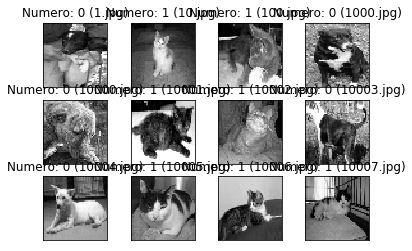

In [10]:
fig = plt.figure()
num = 0

testing_data = np.load(TEST_DATA, allow_pickle=True)
with open("result.txt", 'w') as fp:
    for img_data in testing_data:
        img = img_data[0]
        orig = img
        img = img.reshape(-1, COL_SIZE, ROW_SIZE, 1)
        prediction = model.predict(img)[0]
        str_label = f"Numero: {np.argmax(prediction)} ({img_data[1]})"
        output = ["{0:.2f}%".format(i * 100) for i in prediction]
        fp.write(f"{str(output)}\n")
        
        if num < 12:
            print(["{0:.2f}%".format(i * 100) for i in prediction])
            y = fig.add_subplot(3, 4, num + 1)
            y.imshow(orig, cmap='gray')
            plt.title(str_label)
            y.axes.get_xaxis().set_visible(False)
            y.axes.get_yaxis().set_visible(False)
        num += 1
    plt.show()


